# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Uttam Mishra
##### **Team Member 2 -** Kshitij Singh


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/theuttammishra/Retail-Sales.git

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Libraries

In [2]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Dataset Loading

In [3]:
# Mounting Google Drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the Rossmann and store datasets
df1 = pd.read_csv('/content/drive/My Drive/Retail Sales Prediction/Rossmann Stores Data.csv')
df2 = pd.read_csv('/content/drive/My Drive/Retail Sales Prediction/store.csv')

### Dataset First View

In [5]:
# Rossmann Dataset First Look
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Store Dataset First Look
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Rossmann Dataset Rows & Columns count
Rows , Columns = df1.shape
print('Number of Rows', Rows )
print('Number of Columns', Columns )

Number of Rows 1017209
Number of Columns 9


In [8]:
# Store Dataset Rows & Columns count
Rows , Columns = df2.shape
print('Number of Rows', Rows )
print('Number of Columns', Columns )

Number of Rows 1115
Number of Columns 10


### Dataset Information

In [9]:
# Rossmann Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
# Store Dataset Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##Going through both the datasets we see that store column is common in both. So we can merge them together for ease of work.



In [11]:
# Merging Rossmann and store dataset
df = df1.merge(df2)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


#### Duplicate Values

In [14]:
# Dataset Duplicate Value 
df.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


<Axes: ylabel='Density'>

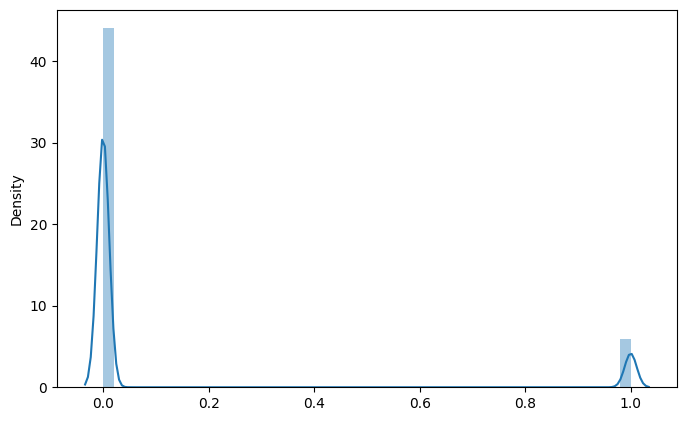

In [16]:
# Visualizing the missing values
sns.distplot(df.isnull())

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

1. Id - Unique entry id:

2. Store - a unique Id for store.

3. Sales - Sales made for a day.

4. Customers - the number of customers that visited in a particular day.
.
5. Open - to show whether store was open: 0 = closed, 1 = open.

6. StateHoliday - indicates a state holiday.

7. SchoolHoliday - indicates a school holiday.

8. StoreType - Type of the store.
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended

10. CompetitionDistance - distance from the nearest competitor store.

11. CompetitionOpenSince [Month/Year] - year and month of the time the nearest competitor was opened

12. Promo - store running a promo or not

13. Promo2 - store running consecutive promo or not

14. Promo2Since[Year/Week] - the year and week when the store started participating in Promo2

15. PromoInterval - describes the consecutive intervals Promo2 is started,

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
count=df[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique value count for each column:\n",count)
     

Unique value count for each column:
 Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64


## 3. ***Data Wrangling***

As we saw above that in the dataset that columns ***'CompetitionDistance' , 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear' , 'Promo2SinceWeek' , 'Promo2SinceYear' , 'PromoInterval'*** contained null values.
in order to get correct outcomes from the data we perform data wrangling.

### Data Wrangling Code

In [20]:
#Filling Nan Values With Median 
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [21]:
#Checking that Nan Value is Replaced or Not
df['CompetitionDistance'].isnull().value_counts()

False    1017209
Name: CompetitionDistance, dtype: int64

In [22]:
#Filling Nan Values With Mode
df['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [23]:
#Filling Nan Values With Mode
df['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [24]:
#Filling Nan Values With 0
df[['Promo2SinceWeek','Promo2SinceYear']]=df2[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)

In [25]:
#As PromoInterval is Object Type so Replacing its Null value with 0
df['PromoInterval']=df2['PromoInterval'].replace(np.nan,"0")


Correcting date and time format

In [26]:
# changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [27]:
# Printing the values to double check
print(df['Date'].min(),'Starting Date')
print(df['Date'].max(),'Ending Date')

2013-01-01 00:00:00 Starting Date
2015-07-31 00:00:00 Ending Date


In [125]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

Sorting the values from store column

In [29]:
# Sorting the values
df.sort_values(by=['StoreType'],inplace=True,ascending = True)

In [30]:
# getting the types of stores
df.StoreType.unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [31]:
#sorting Assortment values
df.sort_values(by=['Assortment'],inplace=True,ascending=True)

In [32]:
# Printing the values
df.Assortment.unique()

array(['a', 'b', 'c'], dtype=object)

In [33]:
# Checking unique values in stateholiday column
df.StateHoliday.unique()

array(['0', 'b', 0, 'a', 'c'], dtype=object)

In [34]:
df["StateHoliday"].replace({"a": 1, "b": 1,"c":1}, inplace=True)
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Checking different store types and number of stores.

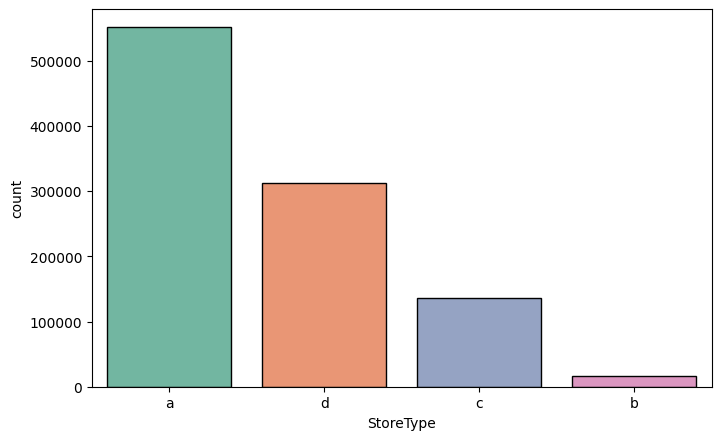

In [35]:
# Plotting the store types
ax=sns.countplot(x=df['StoreType'],palette='Set2',edgecolor='black')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

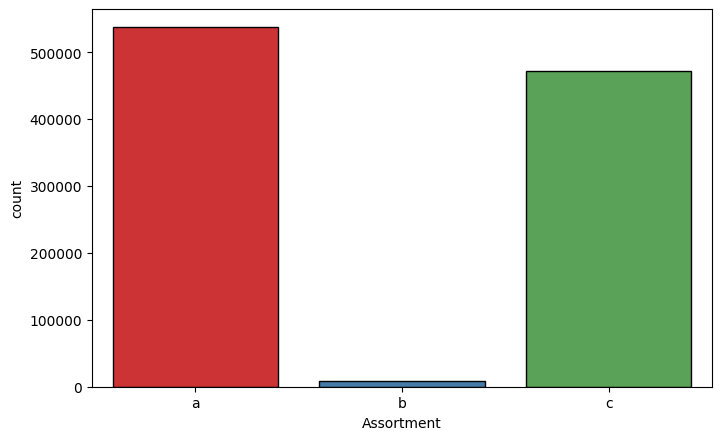

In [36]:
# Plotting the Assortment
ax=sns.countplot(x = df['Assortment'],palette='Set1',edgecolor='black')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Chart-3 Number of Stores operating each day of the week 

<Axes: xlabel='DayOfWeek', ylabel='count'>

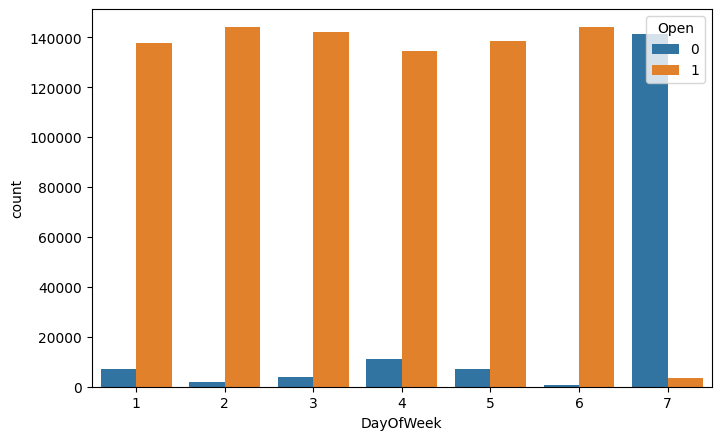

In [37]:
# Visualizing the number of stores operating each weekdays
sns.countplot(x='DayOfWeek',hue='Open',data=df, orient = 'h')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Yearwise Sales

   Year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


<Axes: xlabel='Year', ylabel='Sales'>

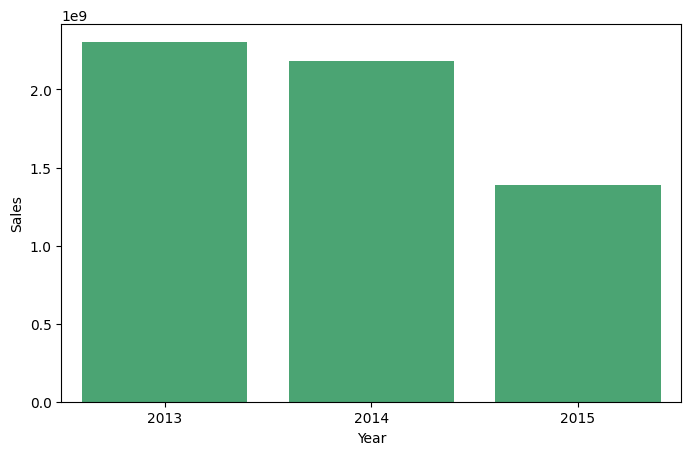

In [38]:
YearwiseSales=df.groupby(['Year'],as_index=False).agg({'Sales':"sum"})
print(YearwiseSales)
# plot the YearwiseSales
sns.barplot(x = 'Year', y = 'Sales',data=YearwiseSales,color='mediumseagreen' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Yearwise Sales

Year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64


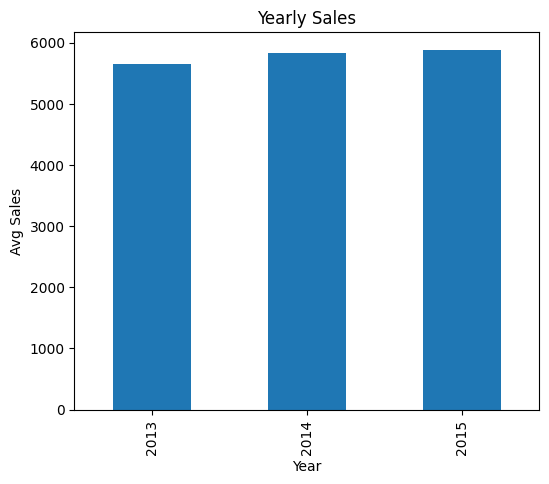

In [39]:
YearwiseSales = df.groupby(['Year'])['Sales'].mean()
YearwiseSales.plot(kind='bar', title='Yearly Sales', ylabel='Avg Sales', xlabel='Year', figsize=(6, 5) )
print(YearwiseSales)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Effect of promo on sales and customers

Text(0.5, 1.0, 'Effect of Promo on Sales and Customers')

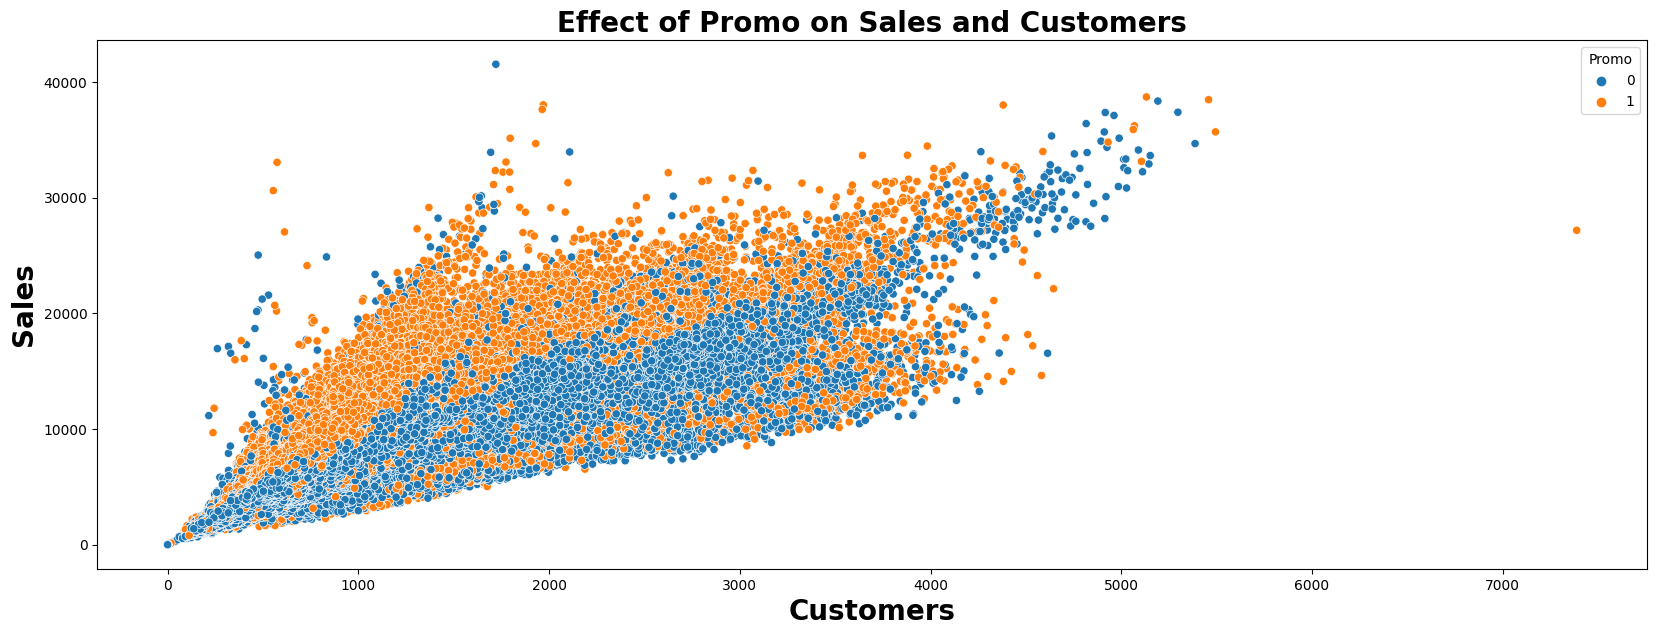

In [40]:
plt.figure(figsize=(20,7))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Effect of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Effect of School Holidays on Sales

Text(0.5, 1.0, 'Effect of School Holidays on Sales')

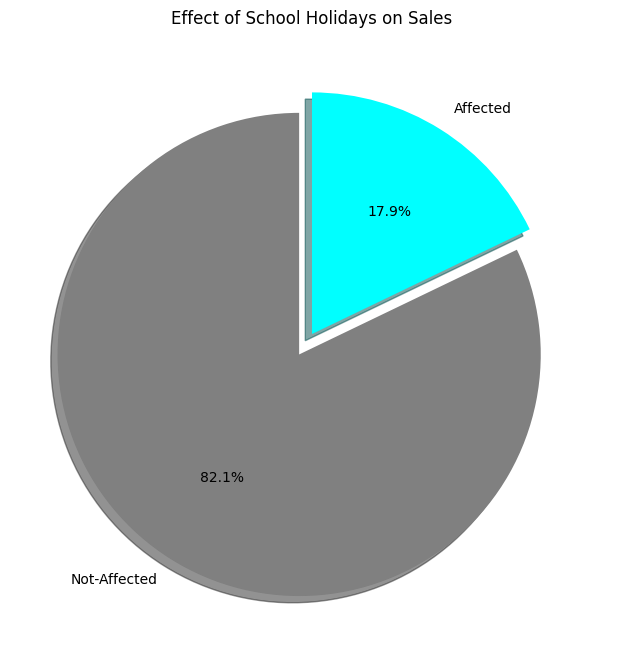

In [41]:
plt.figure(figsize=(15,8))
labels = 'Not-Affected' , 'Affected'
data = df.SchoolHoliday.value_counts()
plt.pie(data, explode=(0.1,0.0), labels=labels, colors = ['grey', 'cyan'], autopct='%1.1f%%', shadow=True,startangle = 90)
plt.title("Effect of School Holidays on Sales")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Relationship between store type, Assortment and sales

<Axes: xlabel='StoreType', ylabel='Sales'>

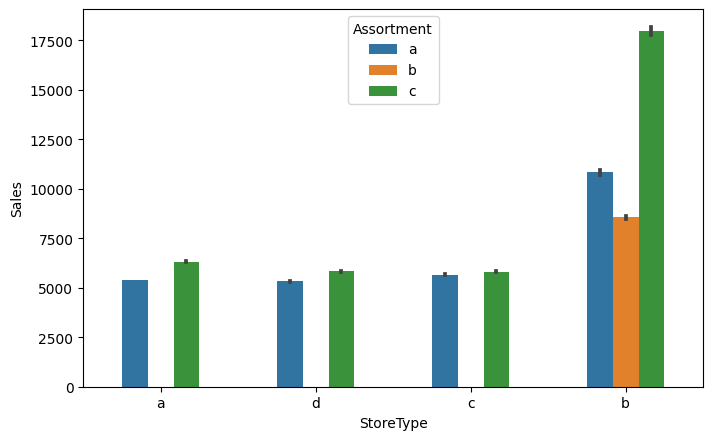

In [42]:
sns.barplot(x= df["StoreType"],y= df['Sales'],hue= df["Assortment"], width = 0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Sales by each kind of store

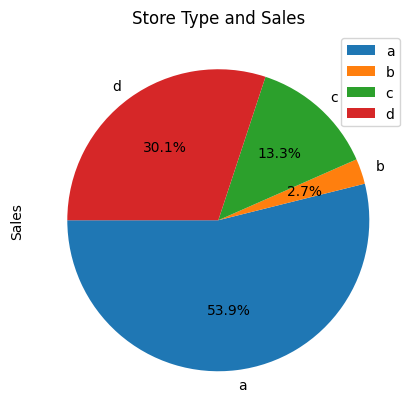

In [43]:
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%',startangle = 180)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


#### Chart - 10 Sales in each day

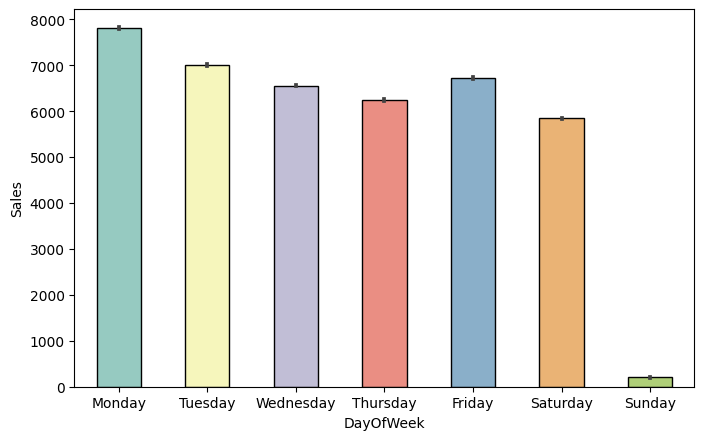

In [95]:

sns.barplot(x=df['DayOfWeek'],y=df['Sales'],edgecolor='black', width = 0.5,palette = 'Set3')
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 Effect of promo in sales

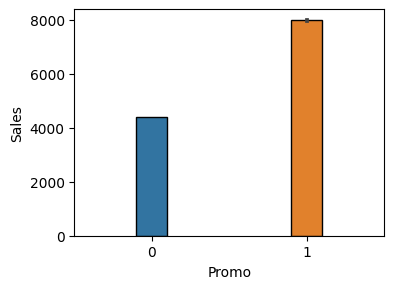

In [45]:
plt.figure(figsize=(4,3))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black', width = 0.2)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Average Sales of each month

<Axes: xlabel='Month', ylabel='Sales'>

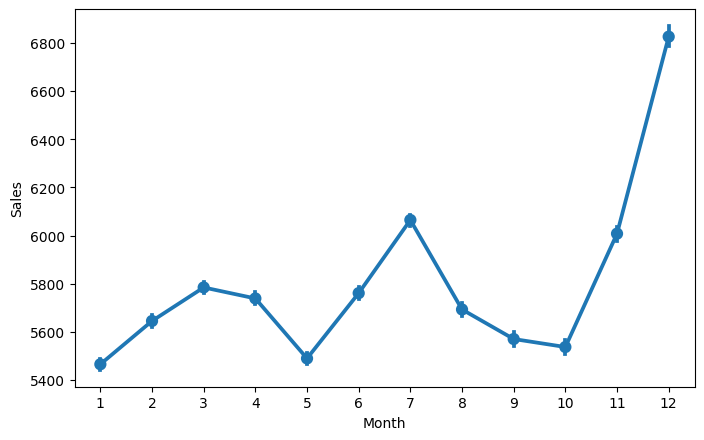

In [98]:

sns.pointplot(x='Month', y='Sales', data = df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 Sale vs store type

Text(0.5, 1.0, 'Boxplot For Sales Values with respect to Store Type')

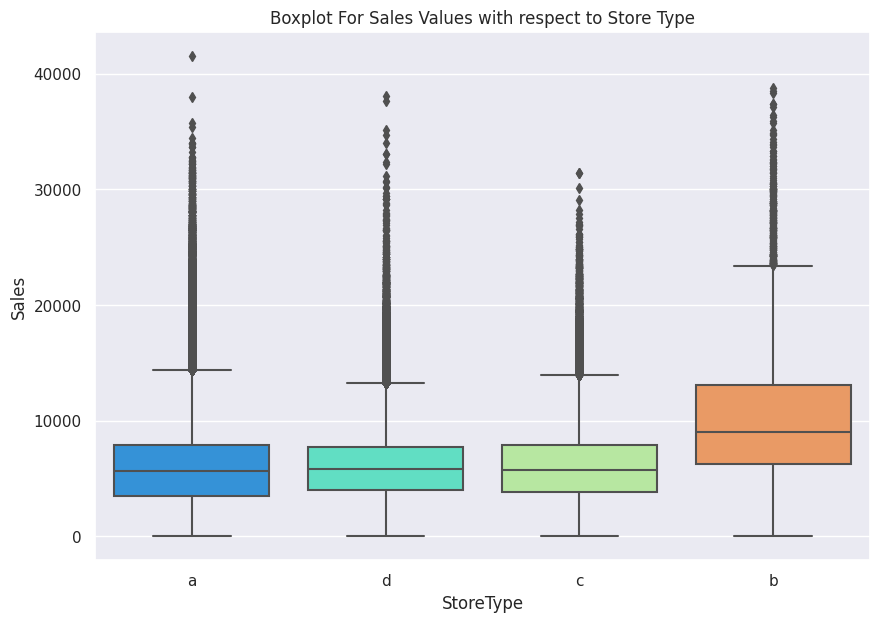

In [99]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="StoreType", y="Sales", data=df,palette='rainbow')
plt.title('Boxplot For Sales Values with respect to Store Type')
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

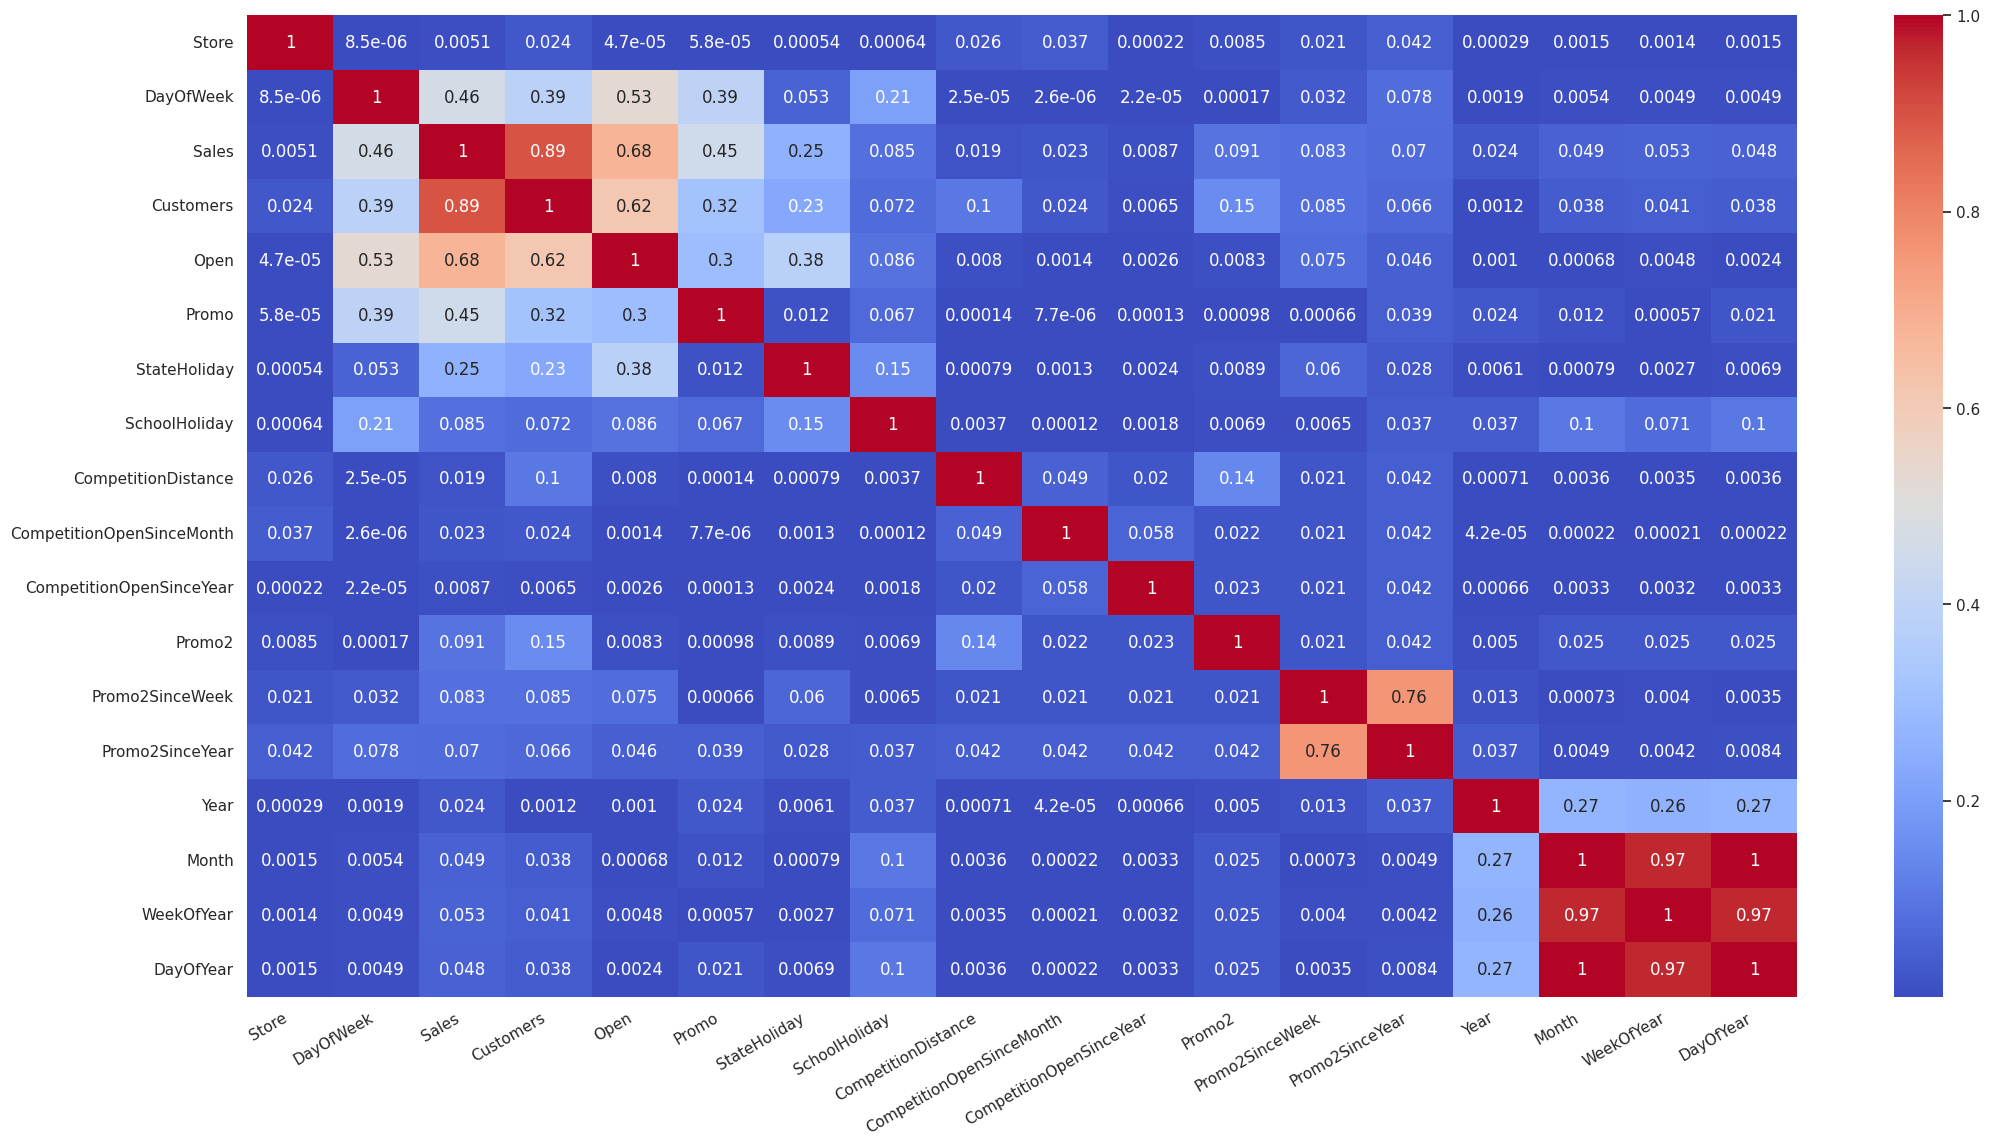

In [106]:
plt.figure(figsize=(25,13))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1


Null Hypothesis (H0) - There is no relation between DayOfWeek and Sales

Alternate Hypothesis (H1) - There is a relationship between DayOfWeek and sales

#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["DayOfWeek"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=-0.606, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on DayOfWeek and sales features we got Correlation coefficient as -0.221 which implies that theses two features are having weak negative correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [109]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Customers"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.955, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.939 which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relationship between SchoolHoliday and Sales

#### 2. Perform an appropriate statistical test.

In [112]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["SchoolHoliday"].head(1500)
second_sample = df["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.128, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.334 which implies that theses two features are having weak positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [115]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                          0
Assortment                         0
CompetitionDistance                0
CompetitionOpenSinceMonth          0
CompetitionOpenSinceYear           0
Promo2                             0
Promo2SinceWeek              1016094
Promo2SinceYear              1016094
PromoInterval                1016094
Year                               0
Month                              0
WeekOfYear                         0
DayOfYear                          0
dtype: int64

In [185]:
df2["Promo2SinceWeek"].fillna(0, inplace=True)
df2["Promo2SinceYear"].fillna(0, inplace=True)
df2["PromoInterval"].fillna(0, inplace=True)
     

In [213]:

#since the stores closed had 0 sale value; removing the irrelevant part
df_1 = df[df.Open != 0]
df_1.drop('Open', axis=1, inplace=True)

In [214]:

#changing into boolean 
df_1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [215]:

Numeric_features = ['Date','Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear']
Categorical_feature = ['Store','DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2','PromoInterval']
     

In [216]:

#setting date and store as index
df_1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df_1.sort_index(inplace=True)
     

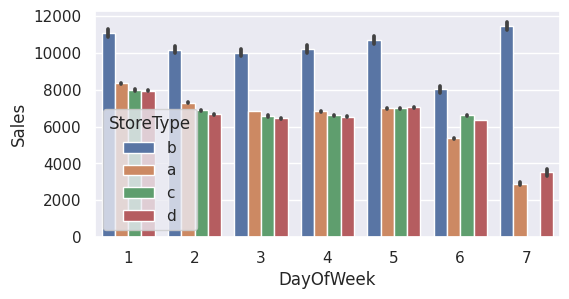

In [217]:

plt.figure(figsize=(6,3))
ax = sns.barplot(x=df_1['DayOfWeek'],y=df_1["Sales"],hue=df_1['StoreType'])

In [218]:
df_1.loc[(df_1['DayOfWeek']==7) & (df_1['StoreType']=='b')]

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-06 85             7  10509       1509      0             0   
           259            7   7926       1686      0             0   
           262            7  23240       3479      0             0   
           274            7   3802        932      0             0   
           335            7   7213       1310      0             0   
...                     ...    ...        ...    ...           ...   
2015-07-26 733            7  16172       3352      0             0   
           769            7  11075       2783      0             0   
           948            7  12040       2346      0             0   
           1081           7   5766        875      0             0   
           1097           7  13307       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date       Store                                                                
2013-01-06 85                          10.0                    2011.0       0   
           259                          9.0                    2013.0       0   
           262                          5.0                    2013.0       0   
           274                          9.0                    2013.0       1   
           335                          9.0                    2013.0       1   
...                                     ...                       ...     ...   
2015-07-26 733                         10.0                    1999.0       0   
           769                          9.0                    2013.0       1   
           948                          9.0                    2013.0       0   
           1081                         3.0                    2006.0       0   
           1097                         3.0                    2002.0       0   

                  Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  \
Date       Store                                                                
2013-01-06 85                 NaN              NaN           nan  2013      1   
           259                NaN              NaN           nan  2013      1   
           262                NaN              NaN           nan  2013      1   
           274                NaN              NaN           nan  2013      1   
           335                NaN              NaN           nan  2013      1   
...                           ...              ...           ...   ...    ...   
2015-07-26 733                NaN              NaN           nan  2015      7   
           769                NaN              NaN           nan  2015      7   
           948                NaN              NaN           nan  2015      7   
           1081               NaN              NaN           nan  2015      7   
           1097               NaN              NaN           nan  2015      7  

In [219]:

numeric_cols = ['CompetitionDistance', 'CompetitionOpen', 'Promo2Open', 
               'Month', 'Year','WeekOfYear','DayOfYear']
     

In [220]:

categorical_cols=['Promo','Promo2','SchoolHoliday','StateHoliday','PromoRunning']

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [221]:
# Handling Outliers & Outlier treatments
df_1['Sales'].skew()

1.5939220392699818

In [222]:
print("Mean value of Sales",df_1['Sales'].mean())
print("Std value of Sales",df_1['Sales'].std())
print("Min value of Sales",df_1['Sales'].min())
print("Max value of Sales",df_1['Sales'].max())

Mean value of Sales 6955.514290755952
Std value of Sales 3104.2146804283475
Min value of Sales 0
Max value of Sales 41551


In [223]:
# Finding the boundary values
print("Highest allowed",df_1['Sales'].mean() + 3*df_1['Sales'].std())
print("Lowest allowed",df_1['Sales'].mean() - 3*df_1['Sales'].std())

Highest allowed 16268.158332040995
Lowest allowed -2357.1297505290904


In [224]:

# Finding the outliers
df_1[(df_1['Sales'] > 10.03) | (df_1['Sales'] < 7.48)]

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   
...                     ...    ...        ...    ...           ...   
2015-07-31 1111           5   5723        422      1             0   
           1112           5   9626        767      1             0   
           1113           5   7289        720      1             0   
           1114           5  27508       3745      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-31 1111               1         a          a               1900.0   
           1112               1         c          c               1880.0   
           1113               1         a          c               9260.0   
           1114               1         a          c                870.0   
           1115               1         d          c               5350.0   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date       Store                                                                
2013-01-01 85                          10.0                    2011.0       0   
           259                          9.0                    2013.0       0   
           262                          5.0                    2013.0       0   
           274                          9.0                    2013.0       1   
           335                          9.0                    2013.0       1   
...                                     ...                       ...     ...   
2015-07-31 1111                         6.0                    2014.0       1   
           1112                         4.0                    2006.0       0   
           1113                         9.0                    2013.0       0   
           1114                         9.0                    2013.0       0   
           1115                         9.0                    2013.0       1   

                  Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  \
Date       Store                                                                
2013-01-01 85                 NaN              NaN           nan  2013      1   
           259                NaN              NaN           nan  2013      1   
           262                NaN              NaN           nan  2013      1   
           274                NaN              NaN           nan  2013      1   
           335                NaN              NaN           nan  2013      1   
...                           ...              ...           ...   ...    ...   
2015-07-31 1111               NaN              NaN           nan  2015      7   
           1112               NaN              NaN           nan  2015      7   
           1113               NaN              NaN           nan  2015      7   
           1114               NaN              NaN           nan  2015      7   
           1115               NaN              NaN           nan  2015      7  

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

###4. Feature Manipulation

In [225]:
# Manipulate Features to minimize feature correlation and create new features
#combining competition open since month and year into total months
df_1['CompetitionOpen'] = (df_1['Year'] - df_1['CompetitionOpenSinceYear'])*12 + (df_1['Month'] - df_1['CompetitionOpenSinceMonth'])
df_1['CompetitionOpen'] 

Date        Store
2013-01-01  85        15.0
            259       -8.0
            262       -4.0
            274       -8.0
            335       -8.0
                     ...  
2015-07-31  1111      13.0
            1112     111.0
            1113      22.0
            1114      22.0
            1115      22.0
Name: CompetitionOpen, Length: 844392, dtype: float64

In [226]:
#correcting the neg values
df_1['CompetitionOpen'] = df_1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
df_1['CompetitionOpen']
     

Date        Store
2013-01-01  85        15.0
            259        0.0
            262        0.0
            274        0.0
            335        0.0
                     ...  
2015-07-31  1111      13.0
            1112     111.0
            1113      22.0
            1114      22.0
            1115      22.0
Name: CompetitionOpen, Length: 844392, dtype: float64

In [227]:
#dropping both the columns
df_1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [228]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df_1['Promo2Open'] = (df_1['Year'] - df_1['Promo2SinceYear'])*12 + (df_1['WeekOfYear'] - df_1['Promo2SinceWeek'])*0.230137 + (df_1['Promo2'])
df_1['Promo2Open']
     

Date        Store
2013-01-01  85      NaN
            259     NaN
            262     NaN
            274     NaN
            335     NaN
                     ..
2015-07-31  1111    NaN
            1112    NaN
            1113    NaN
            1114    NaN
            1115    NaN
Name: Promo2Open, Length: 844392, dtype: float64

In [229]:
#correcting the neg values
df_1['Promo2Open'] = df_1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df_1['Promo2']
df_1['Promo2Open']
     

Date        Store
2013-01-01  85      NaN
            259     NaN
            262     NaN
            274     NaN
            335     NaN
                     ..
2015-07-31  1111    NaN
            1112    NaN
            1113    NaN
            1114    NaN
            1115    NaN
Name: Promo2Open, Length: 844392, dtype: float64

In [230]:
#dropping both the columns
df_1.drop(['Promo2SinceYear','Promo2SinceWeek','Promo2'], axis=1,inplace=True)

In [ ]:
#Dropping unecessary columns
df_1.drop(['PromoInterval'],axis=1,inplace=True)

     

In [248]:
df_1.drop(['Promo2Open'],axis=1,inplace=True)


### 3. Categorical Encoding

In [249]:
# creating a copy of dataset
copyofdf_1 = df_1.copy()

In [250]:
#importing
from sklearn.preprocessing import OneHotEncoder

In [251]:
#categorical features
categorical_cols_to_encode = ['DayOfWeek', 'StoreType', 'Assortment']

In [252]:

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(copyofdf_1[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols_to_encode))
copyofdf_1[encoded_cols] = encoder.transform(copyofdf_1[categorical_cols_to_encode])
     

In [254]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [255]:
copyofdf_1.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)


In [256]:

copyofdf_1.shape

(844392, 25)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

### 5. Data Transformation

Data Splitting

Splitting the dataframe into two parts, a training set and a test set. The training set consists of data from the start of the year 2013 up to 14th of June 2015, while the test set consists of data from 15th of June 2015 to the end of July 2015.

In [257]:
# Split your data to train and test. Choose Splitting ratio wisely.
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
ross_df_train = copyofdf_1.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
ross_df_test = copyofdf_1.loc[start_test:end_test]
     

In [258]:
# X and y split for train 
X_train = ross_df_train.drop('Sales',axis=1)
y_train = ross_df_train[['Sales']]

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
     


The shape of X_train is: (798540, 24)
The shape of y_train is: (798540, 1)


In [259]:
# X and y split for test
X_test = ross_df_test.drop('Sales',axis=1)
y_test = ross_df_test[['Sales']]


In [260]:
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_test is: (45852, 24)
The shape of y_test is: (45852, 1)


### 6. Data Scaling

In [261]:
# Scaling your data

# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

Scaling in machine learning is used to standardize the range of independent variables or features of a dataset. This is often necessary because the scale of one feature may be vastly different from the scale of another feature. Scaling helps to ensure that no single feature has a disproportionate impact on the model during training and can improve the performance of certain algorithms

## ***7. ML Model Implementation***

In [262]:

sales_mean=copyofdf_1.Sales.mean()

In [263]:

copyofdf_1.isna().sum()

Sales                  0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
CompetitionDistance    0
Year                   0
Month                  0
WeekOfYear             0
DayOfYear              0
CompetitionOpen        0
DayOfWeek_1            0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
Assortment_a           0
Assortment_b           0
Assortment_c           0
dtype: int64

### ML Model - 1

In [264]:
# ML Model - 1 Implementation
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#fitting decision tree
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
     


LinearRegression()

In [265]:

#making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [266]:

#Mean Squared Error or MSE
MSE_train = round(mean_squared_error(y_train,y_pred_train),26)
MSE_test = round(mean_squared_error(y_test,y_pred_test),26)
     

In [267]:


print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)
     

Weights:  [[ 0.93771941  0.20410278  0.00362258  0.01438034  0.05364088  0.03921808
  -0.01620644 -0.00737895  0.05901182  0.01292613  0.0489356  -0.00816453
  -0.024387   -0.03273137 -0.01473226  0.02949364  0.00646943 -0.0456277
  -0.1526229  -0.04680882  0.12851959 -0.01280327 -0.1282724   0.03809955]]
Intercept:  [2.0883787e-15]


In [268]:
MAE_train = mean_absolute_error(y_train,y_pred_train)
print("MAE Train :" ,MAE_train)

MAE_test = mean_absolute_error(y_test,y_pred_test)
print("MAE Test:" ,MAE_test)

MSE_train  = mean_squared_error(y_train,y_pred_train)
print("MSE Train :" , MSE_train)

MSE_test  = mean_squared_error(y_test,y_pred_test)
print("MSE Test:" , MSE_test)

RMSE_train = np.sqrt(MSE_train)
print("RMSE Train:" ,RMSE_train)

RMSE_test = np.sqrt(MSE_test)
print("RMSE Test:" ,RMSE_test)

RMSPE_train=RMSE_train/sales_mean
print("RMSPE Train:",RMSPE_train)

RMSPE_test=RMSE_test/sales_mean
print("RMSPE Test:",RMSPE_test)

R2_train= r2_score(y_train,y_pred_train)
print("R2 Train:" ,R2_train)

R2_test= r2_score(y_test,y_pred_test)
print("R2 Test:" ,R2_test)

ADJUSTED_R2_train=1-((1-R2_train)*(168879-1)/(168879-1-26))
print("Adjusted R2 Train :" ,ADJUSTED_R2_train)

ADJUSTED_R2_test=1-((1-R2_test)*(168879-1)/(168879-1-26))
print("Adjusted R2 Test:" ,ADJUSTED_R2_test)
     

MAE Train : 0.3026517774689327
MAE Test: 0.31294012382219055
MSE Train : 0.1701392087832692
MSE Test: 0.18780493083608582
RMSE Train: 0.4124793434625172
RMSE Test: 0.43336466265269696
RMSPE Train: 5.9302493851635424e-05
RMSPE Test: 6.230519333827682e-05
R2 Train: 0.8298607912167307
R2 Test: 0.8102974532461569
Adjusted R2 Train : 0.8298345930110336
Adjusted R2 Test: 0.8102682426580939


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [83]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***